In [1]:
import numpy as np
import scipy.special
import scipy.ndimage
import matplotlib.pyplot as plt
import pandas as pd
import pickle
%matplotlib inline

In [2]:
try:
    f = open('MNIST_Train_extended.pckl', 'rb')
    traindf = pickle.load(f)
    f.close()
    print("found training df")
    creation_of_training_df_required = False
except:
    traindf = pd.DataFrame()
    print("training df not found creation required")
    creation_of_training_df_required = True

found training df


In [3]:
if creation_of_training_df_required:
    train_file = open('mnist_train.csv', 'r')
    train_list = train_file.readlines()
    train_file.close()
    traindf = pd.DataFrame()
    
    for record in train_list:
        all_values = record.split(',')
        inputs        = (np.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01
        scaled_input =  inputs.reshape(28,28)
        very_blurred = scipy.ndimage.gaussian_filter(scaled_input, sigma=1)
        inputs_plus10_img = scipy.ndimage.rotate(scaled_input,  10.0, cval=0.01, order=1, reshape=False)
        inputs_minu10_img = scipy.ndimage.rotate(scaled_input, -10.0, cval=0.01, order=1, reshape=False)
        newdf = pd.DataFrame({'Label' : all_values[0],
                              'image' : [inputs],
                             'blurred': [very_blurred.reshape(784)],
                           'rotplus10': [inputs_plus10_img.reshape(784)],
                           'rotminu10': [inputs_minu10_img.reshape(784)]})
        traindf = traindf.append(newdf,  sort=True, ignore_index=True)[newdf.columns.tolist()]
        pass
    
    f = open('MNIST_Train_extended.pckl', 'wb')
    pickle.dump(traindf, f)
    f.close()

In [4]:
traindf.reset_index(drop=True)
traindf.head()

,Label,image,blurred,rotplus10,rotminu10
0,5,"[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.010000000000000002,..."
1,0,"[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.010000000000000002,..."
2,4,"[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.010000000000000002,..."
3,1,"[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.010000000000000002,..."
4,9,"[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...","[0.01, 0.01, 0.01, 0.01, 0.010000000000000002,..."


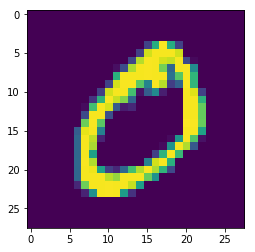

In [8]:
plt.imshow(traindf.loc[1]['image'].reshape(28,28))

In [10]:
traindf.loc[0]['image']

array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   